# Gold price prediction using Random Forest

### Importing python libraries

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Data collection and preprocessing

In [2]:
df = pd.read_csv('dataset/gold-price-dataset.csv')

In [3]:
df.head(n=10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


#### Total features

In [4]:
df.shape

(2290, 6)

#### Statistical measures

In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#### Check for missing values

In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**NOTE:** No missing values in the dataset 

### Splitting features and target

In [7]:
X = df.drop(columns=['Date', 'GLD'], axis=1)
y = df['GLD']

In [8]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [10]:
y  # gold prices

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

### Split data into training data and testing data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#### Model training: RandomForestRegressor

In [13]:
model = RandomForestRegressor(n_estimators=100)

In [14]:
model.fit(X_train, y_train)

RandomForestRegressor()

#### model evaluation - accuracy

In [18]:
test_data_prediction = model.predict(X_test)

In [19]:
test_data_prediction

array([168.68129977,  81.84759979, 116.09939999, 127.76150049,
       120.56250135, 154.71759746, 150.23369835, 126.11420028,
       117.54849864, 126.00430078, 116.94930056, 171.45520065,
       141.54599918, 167.54579832, 115.23830022, 117.7382005 ,
       139.30010301, 170.05430036, 159.87360384, 161.50379919,
       155.1572004 , 125.46290056, 175.97889946, 157.43450335,
       125.22740038,  93.9628003 ,  77.26730027, 120.44790015,
       119.14159977, 167.37859999,  88.1832008 , 125.25680005,
        91.34990074, 117.65569994, 120.99529911, 136.58100086,
       115.39700148, 114.98000092, 148.8342    , 107.17980132,
       104.12720212,  87.27229785, 126.46990033, 118.08529984,
       153.77899934, 119.6583999 , 108.34579984, 108.23589812,
        93.14250065, 127.0921979 ,  74.56860058, 113.76529869,
       121.30849996, 111.26059883, 118.80979901, 120.84219939,
       158.10769984, 166.18360151, 146.99319703,  85.89929851,
        94.37220019,  87.00669886,  90.48219993, 118.90

#### R-squared error

In [20]:
error_score = r2_score(y_test, test_data_prediction)

In [21]:
error_score

0.9887205840482628

#### Compare actual and predicted values in a plot 

In [22]:
y_test = list(y_test)

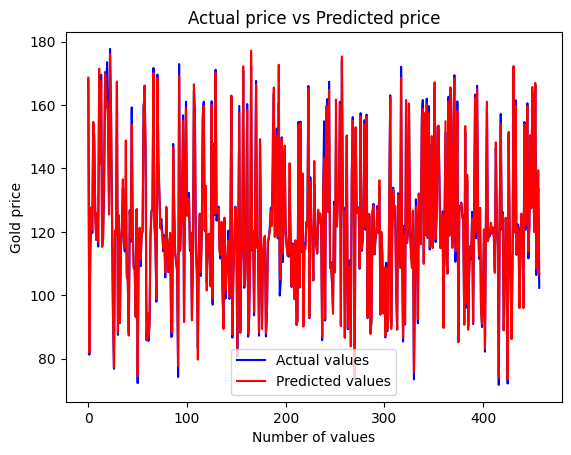

In [24]:
plt.plot(y_test, color='blue', label='Actual values')
plt.plot(test_data_prediction, color='red', label='Predicted values')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()